In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



In [5]:
df = pd.read_csv("data/customer_infos.csv")

In [6]:
df["Frequency"].value_counts()

Frequency
1     90383
2      2752
3       206
4        31
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

## ANALYSIS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93391 entries, 0 to 93390
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93391 non-null  object 
 1   Recency             93391 non-null  int64  
 2   Monetary            93391 non-null  float64
 3   Frequency           93391 non-null  int64  
 4   mean_review_score   93391 non-null  float64
 5   mean_distance       93391 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.3+ MB


let's look missing values

In [8]:
df.isna().sum()

customer_unique_id    0
Recency               0
Monetary              0
Frequency             0
mean_review_score     0
mean_distance         0
dtype: int64

### Monetary

<Axes: ylabel='Monetary'>

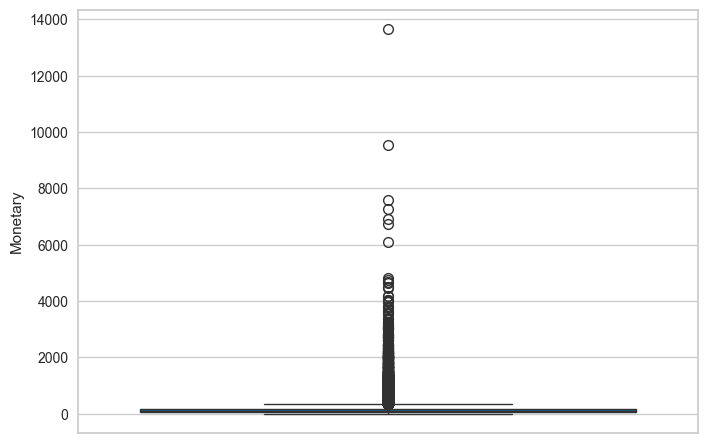

In [9]:
sns.boxplot(df["Monetary"])

I remove monetary above 6000 to have a better look

<Axes: ylabel='Monetary'>

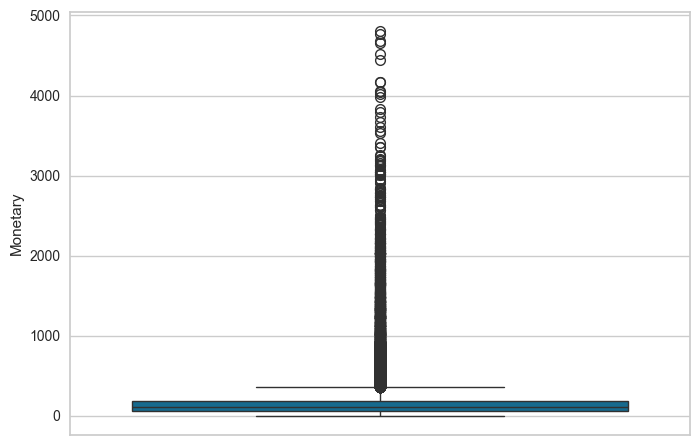

In [10]:
temp = df.loc[df["Monetary"] < 6000, "Monetary"]
sns.boxplot(temp)

### Customer distribution

<Figure size 1500x100 with 0 Axes>

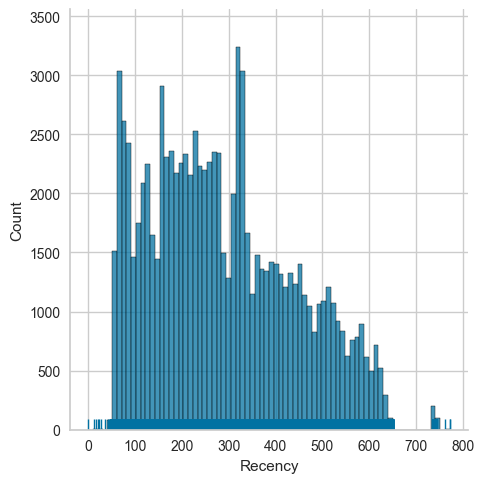

In [11]:
plt.figure(figsize=(15,1))
sns.displot(df["Recency"], kde=False, rug=True)

<Figure size 2000x1200 with 0 Axes>

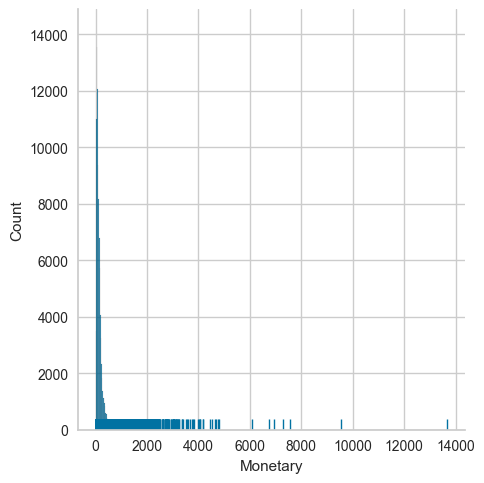

In [12]:
plt.figure(figsize=(20,12))
sns.displot(df["Monetary"], kde=False, rug=True)
plt.show()

<Figure size 1500x100 with 0 Axes>

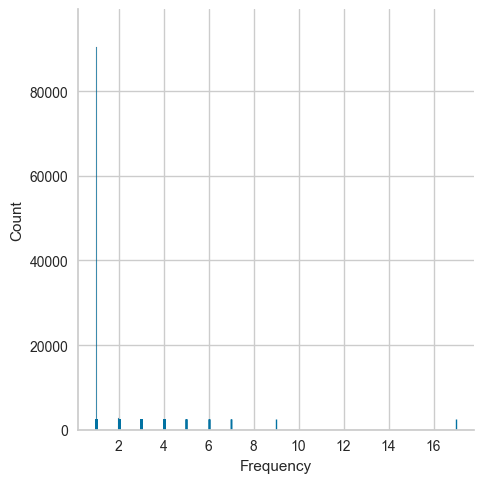

In [13]:
plt.figure(figsize=(15,1))
sns.displot(df["Frequency"], kde=False, rug=True)

<Axes: ylabel='Frequency'>

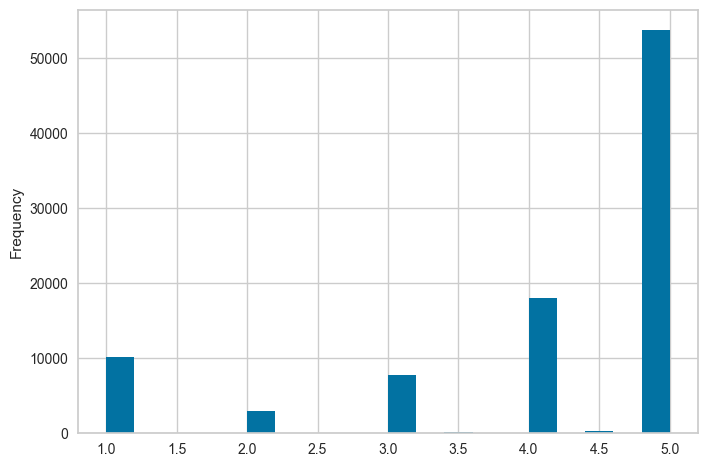

In [14]:
df["mean_review_score"].plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

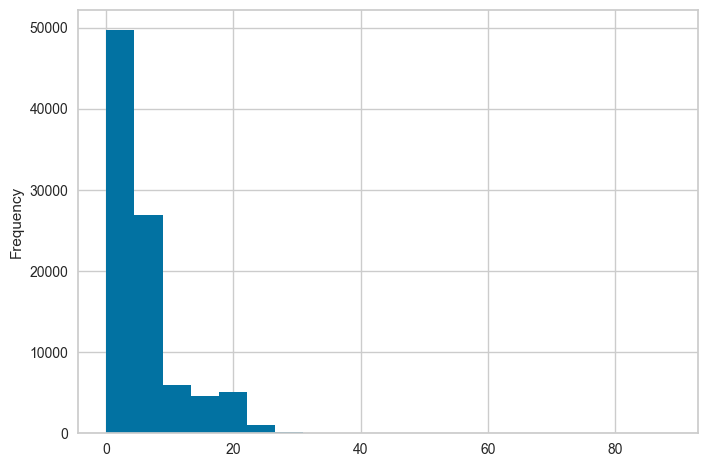

In [15]:
df["mean_distance"].plot(kind="hist", bins=20)

box plot

<Axes: xlabel='Recency', ylabel='Frequency'>

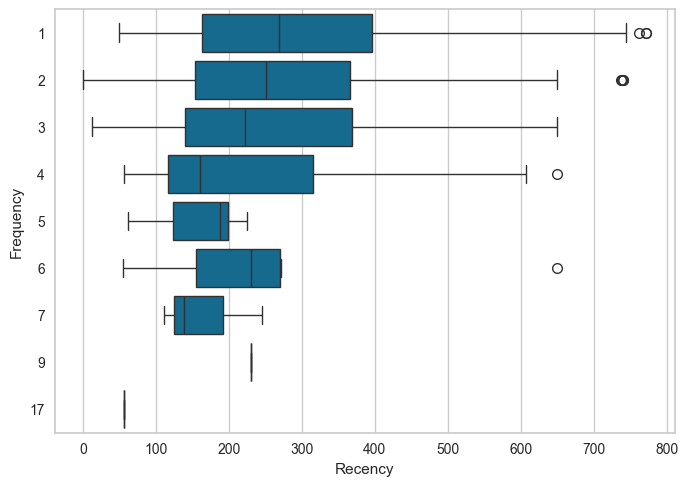

In [16]:
sns.boxplot(x=df["Recency"], y=df["Frequency"], data=df, orient="h")

<Axes: xlabel='Monetary', ylabel='Frequency'>

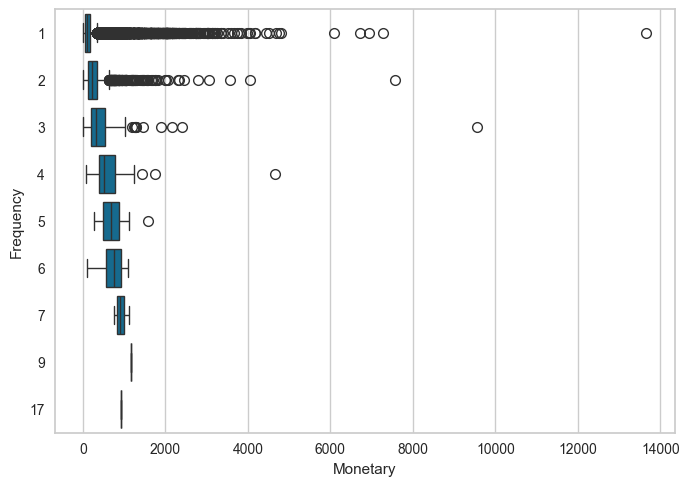

In [17]:
sns.boxplot(x=df["Monetary"], y=df["Frequency"], data=df, orient="h")

# CLUSTURING

In [18]:
X = df.drop(columns="customer_unique_id")
X

,Recency,Monetary,Frequency,mean_review_score,mean_distance
0,160,141.90,1,5.0,1.021571
1,163,27.19,1,4.0,0.137285
2,585,86.22,1,3.0,7.730583
3,369,43.62,1,4.0,17.270880
4,336,196.89,1,5.0,1.437898
...,...,...,...,...,...
93386,495,2067.42,1,5.0,18.224090
93387,310,84.58,1,4.0,13.952046
93388,617,112.46,1,5.0,14.089330
93389,168,133.69,1,5.0,6.143806


let's make a few scatter plot

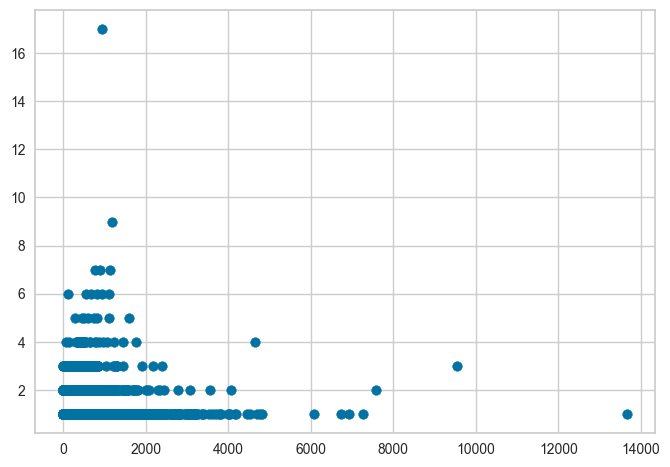

In [19]:
plt.scatter(df["Monetary"], df["Frequency"])

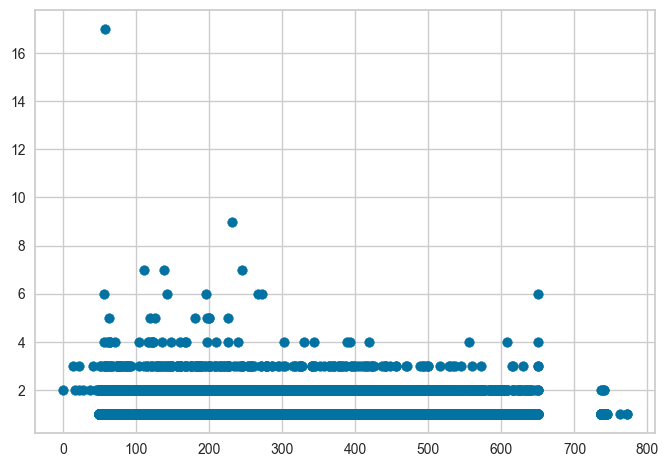

In [20]:
plt.scatter(df["Recency"], df["Frequency"])

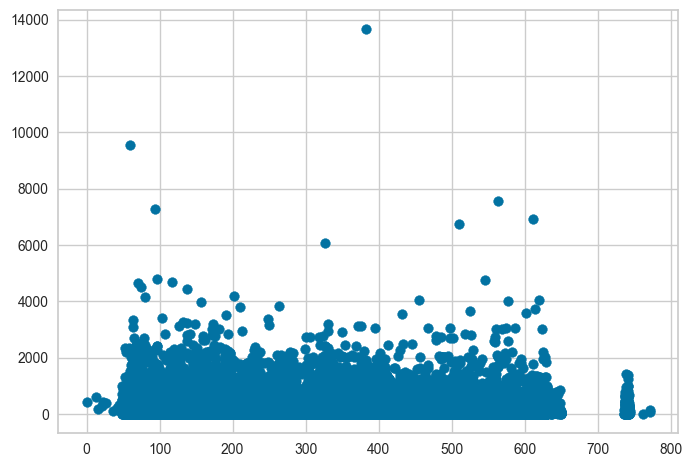

In [21]:
plt.scatter(df["Recency"], df["Monetary"])

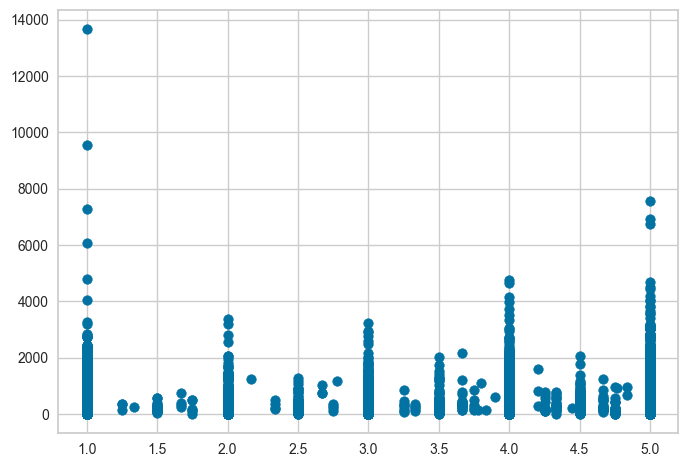

In [22]:
plt.scatter(df["mean_review_score"], df["Monetary"])

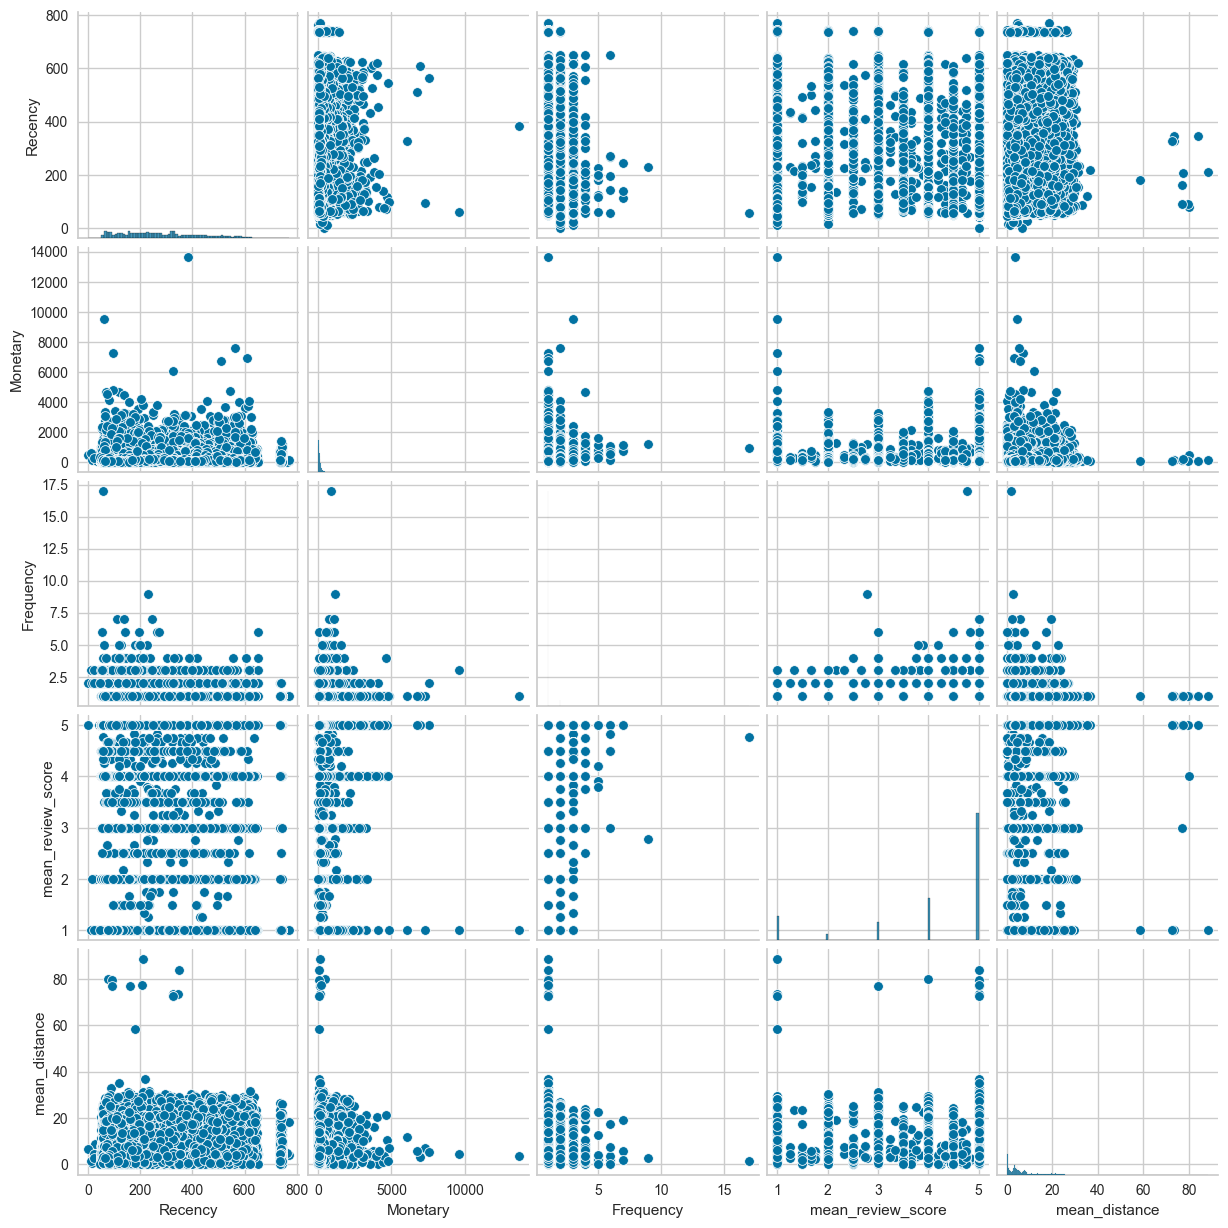

In [23]:
sns.pairplot(X)

## KMEANS

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### choose the number of cluster

mean silouhette score

In [26]:
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    labels = model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(i ,silhouette_avg)

2 0.2227639002829815
3 0.2616374575549059
4 0.29551454680949973
5 0.3231299704214196
6 0.3413917397945612
7 0.3459202917554924
8 0.252312310928904
9 0.26035108662078654
10 0.26573738204748787


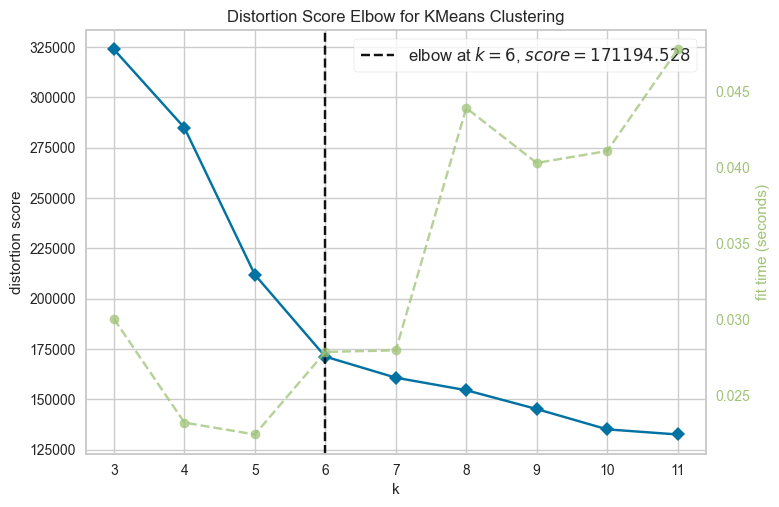

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [28]:
model = KMeans(n_clusters=6)
labels = model.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, labels)

### Make a PCA to visualize our labels

In [ ]:
pca = PCA(n_components=3
          )

X_pca = pca.fit_transform(X_scaled)
eig = pd.DataFrame(
    {
        "Dimension" : pca.get_feature_names_out(), 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,pca0,1.127413,38.0,38.0
1,pca1,0.997735,33.0,71.0
2,pca2,0.874883,29.0,100.0


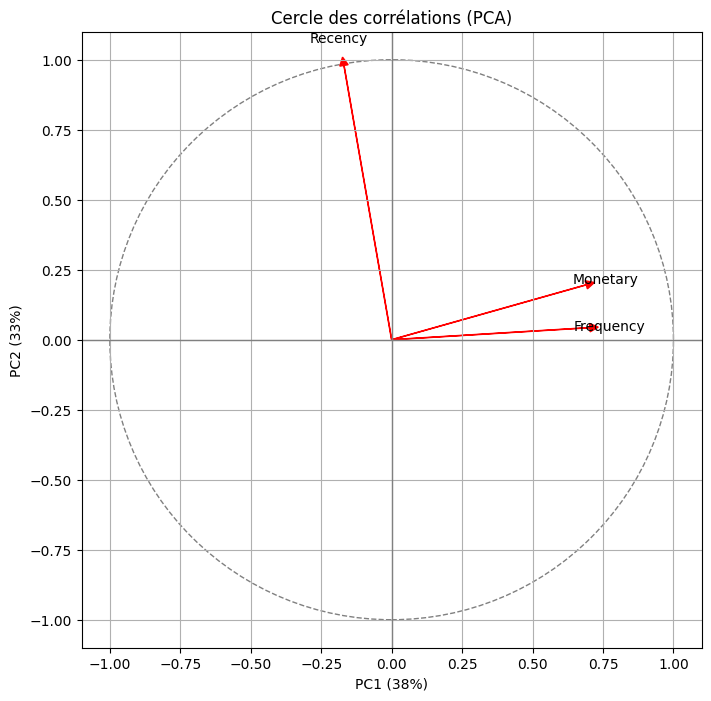

In [ ]:
# Cercle des corrélations pour les deux premières dimensions de la PCA
plt.figure(figsize=(8, 8))
# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Affichage des flèches pour chaque variable
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, var, color='black', ha='center', va='center')

plt.xlabel("PC1 (%s%%)" % int(eig.loc[0, "% variance expliquée"]))
plt.ylabel("PC2 (%s%%)" % int(eig.loc[1, "% variance expliquée"]))
plt.title("Cercle des corrélations (PCA)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

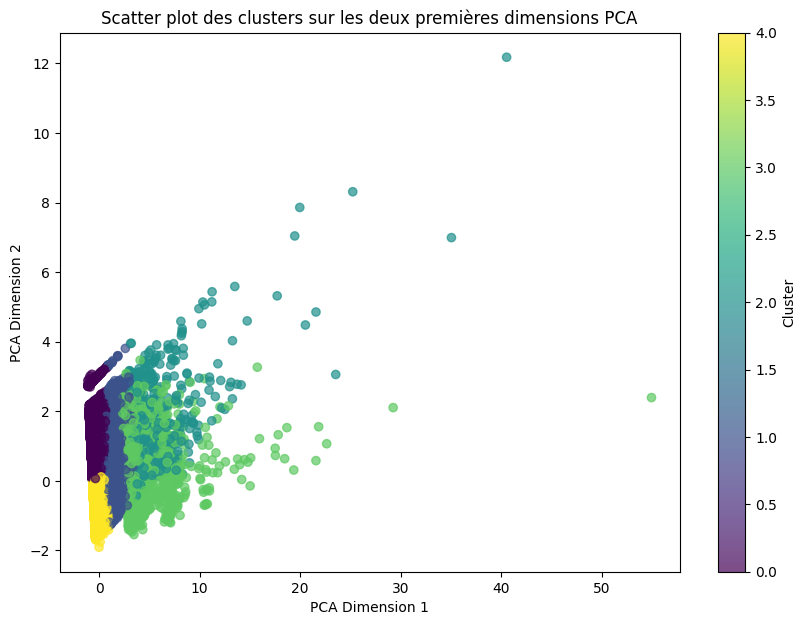

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Scatter plot des clusters sur les deux premières dimensions PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

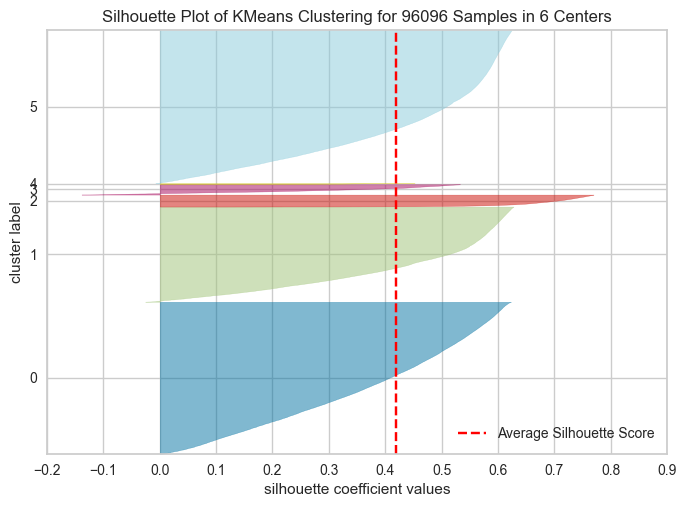

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 96096 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model = KMeans(n_clusters=6)
model.fit(X_scaled)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)    # Fit the data to the visualizer    
visualizer.poof()    # Draw/show/poof the data

<Axes: ylabel='Recency'>

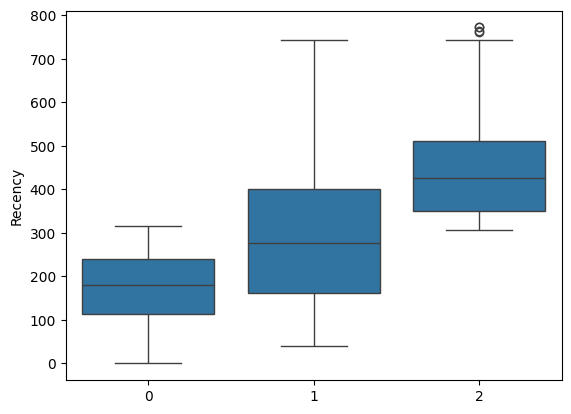

In [ ]:
sns.boxplot(x=labels, y = X["Recency"])

In [ ]:
unique, count = np.unique(labels, return_counts=True)
count

array([53705,  3278, 39113])

Silhouette

In [ ]:
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

In [ ]:
sample_silhouette_values

array([0.61969676, 0.5534931 , 0.56179094, ..., 0.53884679, 0.61727677,
       0.58661465], shape=(96096,))

## CAH

## DBScan 

In [23]:
X_scaled = X_scaled.astype(np.float32)

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)
silhouette_dbscan = silhouette_score(X_scaled, labels_db)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)


Silhouette Score for DBSCAN: 0.5437090532385433


In [25]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels_db = dbscan.fit_predict(X_scaled)
silhouette_dbscan = silhouette_score(X_scaled, labels_db)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)


Silhouette Score for DBSCAN: 0.5452597762533737


In [ ]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

AttributeError: 'DBSCAN' object has no attribute 'n_clusters'